# Logistic Regression from Scratch

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv("Social_Network_Ads.csv")
print(len(df))
df.head()

400


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [72]:
df.drop(columns=['User ID'], inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [73]:
X = df[["Gender", "Age", "EstimatedSalary"]]
y = df[["Purchased"]]
print(X, y)

     Gender  Age  EstimatedSalary
0      Male   19            19000
1      Male   35            20000
2    Female   26            43000
3    Female   27            57000
4      Male   19            76000
..      ...  ...              ...
395  Female   46            41000
396    Male   51            23000
397  Female   50            20000
398    Male   36            33000
399  Female   49            36000

[400 rows x 3 columns]      Purchased
0            0
1            0
2            0
3            0
4            0
..         ...
395          1
396          1
397          1
398          0
399          1

[400 rows x 1 columns]


In [74]:
X = X.replace({"Male": 1, "Female": 0})
print(X)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]


C:\Users\chchr\AppData\Local\Temp\ipykernel_23072\125524957.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({"Male": 1, "Female": 0})


In [75]:
print(type(X), type(y))
print(X.T)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
                   0      1      2      3      4      5      6       7    \
Gender               1      1      0      0      1      1      0       0   
Age                 19     35     26     27     19     27     27      32   
EstimatedSalary  19000  20000  43000  57000  76000  58000  84000  150000   

                   8      9    ...    390    391    392    393    394    395  \
Gender               1      0  ...      1      1      0      1      0      0   
Age                 25     35  ...     48     47     45     60     39     46   
EstimatedSalary  33000  65000  ...  33000  23000  45000  42000  59000  41000   

                   396    397    398    399  
Gender               1      0      1      0  
Age                 51     50     36     49  
EstimatedSalary  23000  20000  33000  36000  

[3 rows x 400 columns]


### Z-Score Normalisation

In [76]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

![Screenshot 2025-07-16 143034.png](<attachment:Screenshot 2025-07-16 143034.png>)
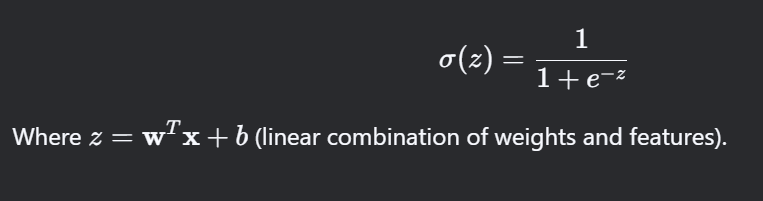

### Defining the Logistic regression/ sigmoid function

In [77]:
def sigmoid(weights, biases, x):
    """Our prediction"""
    
    z = np.dot(x, weights) + biases 
    sigmoid = 1 / (1 + np.exp(-z))
    
    return sigmoid

### Defining our Loss function, intuitively called Log Loss or Binary Cross Entropy

- where y is the actual value 
- and h(x) is the prediction
- this is for a single training example

In [78]:
def logLoss(predictions, real_values):
    totalLoss = 0
    samples = len(real_values)
    
    for sample in range(samples):
        
        prediction = np.clip(predictions[sample], 1e-15, 1 - 1e-15) # deny log 0
        
        loss = (-real_values[sample] * np.log(prediction)) - ((1 - real_values[sample]) * np.log(1 - prediction))
        totalLoss += loss
    
    return totalLoss / samples  

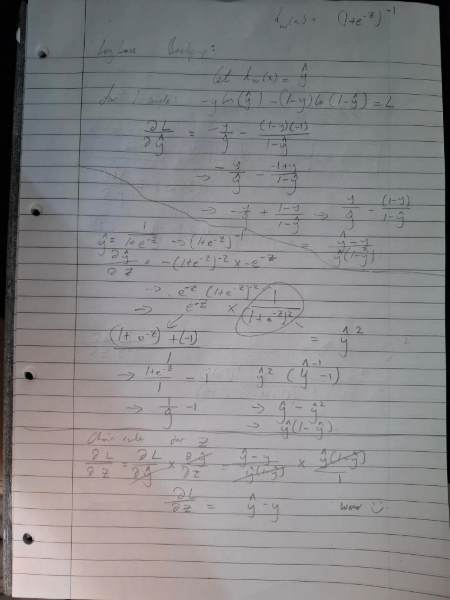

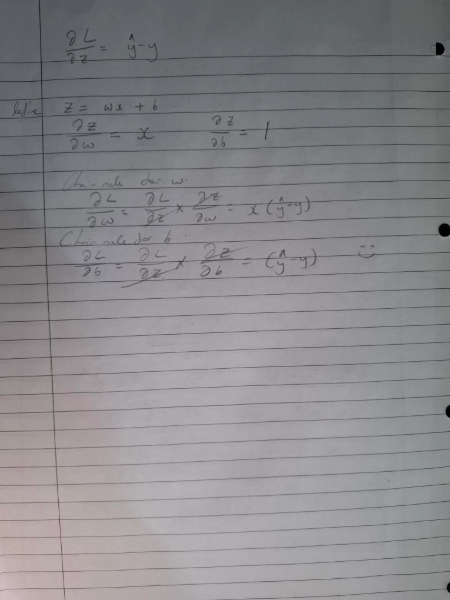

### Defining the derivatives used during gradient descent

In [79]:
def weightGradient(prediction, real_value, x):
    return x * (prediction - real_value)

def biasGradient(prediction, real_value):
    return (prediction - real_value)

## Gradient Descent

In [80]:
def gradientDescent(learning_rate, epochs, X, y):
    m = 400
    w = np.zeros(3)
    b = 0 # due to this dataset using 3 variables for prediction
    
    for sample in range(epochs):
        for i in range(m):
            
            prediction = sigmoid(w, b, X[i]) 
            gradientW = weightGradient(prediction, y[i], X[i])
            gradientB = biasGradient(prediction, y[i])
            
            w = w - (learning_rate * gradientW)
            b = b - (learning_rate * gradientB)
            
    
    return w, b

In [81]:
# Train model

finalWeight, finalBias = gradientDescent(learning_rate=0.0001, epochs=1000, X=X.values, y=y.values)

In [82]:
print(f"""
      Final Weight: {finalWeight},
      Final Bias: {finalBias} 
      """)


      Final Weight: [0.1133237  2.08006278 1.04633474],
      Final Bias: [-0.9939396] 
      


# Defining the Decision Boundary

In [83]:
def finalmodel(x):
    return sigmoid(weights=finalWeight, biases=finalBias, x=x)



In [84]:
X = X.values

In [85]:
results = []

for i in range(len(df)):
    result = finalmodel(X[i])
    results.append(result)

print(results)

[array([0.00214244]), array([0.05049025]), array([0.01417174]), array([0.0262522]), array([0.01222089]), array([0.03369975]), array([0.05820509]), array([0.5590809]), array([0.0107561]), array([0.14452403]), array([0.04288547]), array([0.01860211]), array([0.02010683]), array([0.02681438]), array([0.01204922]), array([0.09256782]), array([0.4021635]), array([0.317978]), array([0.37684637]), array([0.42517223]), array([0.29193978]), array([0.52853395]), array([0.57293162]), array([0.24737264]), array([0.34150765]), array([0.36584447]), array([0.52324933]), array([0.38472892]), array([0.03169097]), array([0.02208963]), array([0.11207854]), array([0.23951054]), array([0.00231694]), array([0.02158025]), array([0.08527289]), array([0.06185641]), array([0.0351482]), array([0.04580418]), array([0.0338561]), array([0.01198236]), array([0.0078262]), array([0.06877149]), array([0.44267214]), array([0.01660741]), array([0.07010084]), array([0.00487744]), array([0.04277454]), array([0.02399602]), 

In [89]:
loss_mean = logLoss(predictions=results, real_values=y.values)
loss_mean

array([0.34808636])